<a href="https://www.kaggle.com/code/mikedelong/udes-dataset-2?scriptVersionId=140892993" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/skills-analysis-dataset-internships/stages_df.csv', index_col=['IDOffre'], low_memory=False,
                parse_dates=['DateDebut', 'DateFin'])
# we have some weird noise in our medical test required column
allowed = {'Oui', 'No', 'Non', 'Yes'} 
df = df[df['TestMedicalRequis'].isin(allowed)]
df.head()

,NomOrganization,Website,SecteurSimplifie,AdresseSite,VilleSite,ProvinceSite,CodePostalSite,PaysSite,Trimestre,DateDebut,...,Teletravail,PasseportVaccinalObligatoire,NombreDePosteOfferts,SalaireParHeure,NombreHeuresParSemaine,NatureOrganisation,FonctionsStagiaire,EnvironnementTravail,ExigencesParticulieres,TestMedicalRequis
IDOffre,,,,,,,,,,,,,,,,,,,,,
93671,Rio Tinto,www.Riotinto.com,3310 - Fabrication - Première transformation d...,"1190, avenue des Canadiens-de-Montréal",Montréal,Québec,H3C 1B3,Canada,2022 - Automne,2022-09-05,...,Non,Oui,1,À déterminer,40.0,Rio Tinto nommé l?un des 100 meilleurs employe...,Au sujet du poste \nNous offrons des opportuni...,À propos de Rio Tinto\n\nÀ l?origine de chaque...,Votre contribution\nAu moins une année complét...,Oui
93667,Sym Communications inc.,NaN,5416 - Services de conseils en gestion et de c...,"24, Mont-Royal Ouest",Montréal,Québec,H2T2S2,Canada,2022 - Automne,2022-09-06,...,Partiellement,Indéterminé,1,À déterminer,35.0,Cabinet de traduction,Le stagiaire devra traduire divers documents é...,Espace de travail ouvert avec une cuisine comp...,"En raison de la pandémie, on priviligéra une f...",Non
93666,Omnimed,https://www.omnimed.com/,5415 - Conception de systèmes informatiques et...,"160, rue Pope",Cookshire-Eaton,Québec,J0B 1M0,Canada,2022 - Automne,2022-05-02,...,Partiellement,Oui,1,19,40.0,<strong>L'entreprise</strong>\n\n<br>\nNous so...,- Prendre en charge les comptes clients\n\n<br...,<strong>Ce que nous t'offrons&nbsp:</strong>\n...,<strong>Nous recherchons une personne avec&nbs...,Non
93665,EnerOptim inc.,http://eneroptim.com/,5416 - Services de conseils en gestion et de c...,"1400, rue Marie-Victorin",Saint-Bruno-de-Montarville,Québec,J3V 6B9,Canada,2022 - Automne,2022-09-05,...,Partiellement,Oui,1,À déterminer,40.0,EnerOptim inc. une jeune entreprise dynamique ...,Sous la supervision du directeur de service ou...,-&nbsp:&nbsp:&nbsp:&nbsp:&nbsp:&nbsp:&nbsp:&nb...,-&nbsp:&nbsp:&nbsp:&nbsp:&nbsp:&nbsp:&nbsp:&nb...,Non
93664,Laboratoires Abbott,www.abbott.com,"3112 - Fabrication - Aliments, boissons et tabac","75, boulevard Pierre-Roux Est",Victoriaville,Québec,G6P 6S9,Canada,2022 - Automne,2022-09-06,...,Non,Non,1,À déterminer,40.0,Abbott est un chef de file mondial dans le dom...,Le stagiaire en comptabilité relèvera du Contr...,1. Environnement de travail respectueux et axé...,<ul>\n \n \n\t\n \n <li>Être enregistré dans u...,Non


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44268 entries, 93671 to 6813
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   NomOrganization               44268 non-null  object        
 1   Website                       37623 non-null  object        
 2   SecteurSimplifie              44265 non-null  object        
 3   AdresseSite                   44268 non-null  object        
 4   VilleSite                     44268 non-null  object        
 5   ProvinceSite                  44268 non-null  object        
 6   CodePostalSite                44268 non-null  object        
 7   PaysSite                      44268 non-null  object        
 8   Trimestre                     44268 non-null  object        
 9   DateDebut                     19601 non-null  datetime64[ns]
 10  DateFin                       19420 non-null  datetime64[ns]
 11  TitreOffre               

In [3]:
df.nunique()

NomOrganization                  4713
Website                          3360
SecteurSimplifie                   69
AdresseSite                      5474
VilleSite                         743
ProvinceSite                       30
CodePostalSite                   4481
PaysSite                           42
Trimestre                          16
DateDebut                         300
DateFin                           397
TitreOffre                      20981
LieuDuStageInscritDansOffre      4760
Teletravail                         4
PasseportVaccinalObligatoire        6
NombreDePosteOfferts               38
SalaireParHeure                    64
NombreHeuresParSemaine             53
NatureOrganisation              19050
FonctionsStagiaire              26244
EnvironnementTravail            20848
ExigencesParticulieres          24035
TestMedicalRequis                   4
dtype: int64

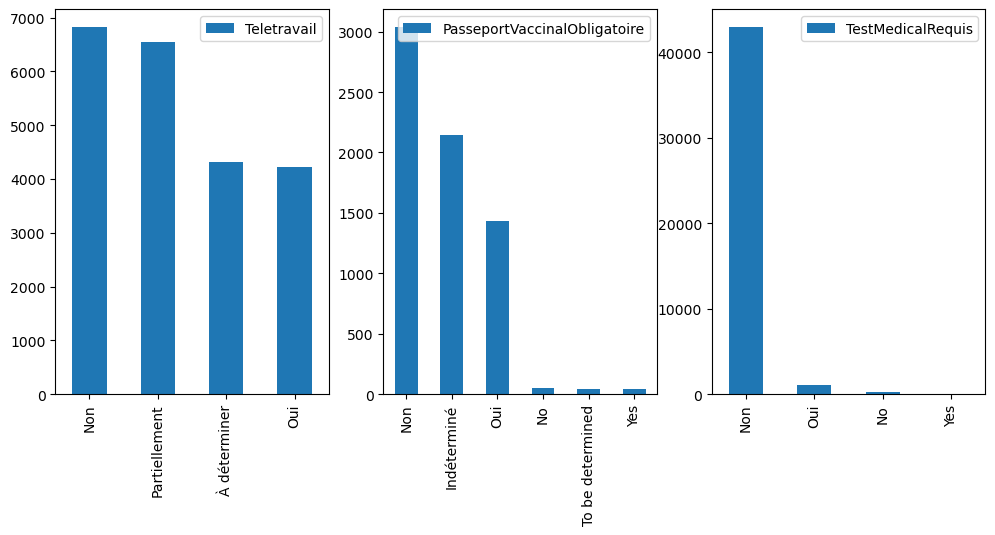

In [4]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(12, 5), ncols=3)
for index, column in enumerate([key for key, value in df.nunique().items() if value < 10]):
    df[column].value_counts().plot(ax=ax[index], kind='bar', legend=True)